### 1) Importing Libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [56]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [57]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} column in our dataset')

There are 11914 rows and 16 column in our dataset


As we can see , there are multiple columns in our dataset     
`make` : car manufacturer such as BMW , Audi , etc    
`Model` : the model of the car

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [59]:
def showColumnDetails(col):
    print(f'Details for {col} \n')
    print(f'Number of unique values is {df[col].nunique()}')
    print(f'Most frequented values \n{df[col].value_counts().nlargest(5)}')
    print(f'number of null values {df[col].isnull().sum()}')
    print('*'*30)
    print('\n')

In [60]:
for col in df.columns:
    showColumnDetails(col)

Details for Make 

Number of unique values is 48
Most frequented values 
Chevrolet     1123
Ford           881
Volkswagen     809
Toyota         746
Dodge          626
Name: Make, dtype: int64
number of null values 0
******************************


Details for Model 

Number of unique values is 915
Most frequented values 
Silverado 1500        156
Tundra                140
F-150                 126
Sierra 1500            90
Beetle Convertible     89
Name: Model, dtype: int64
number of null values 0
******************************


Details for Year 

Number of unique values is 28
Most frequented values 
2015    2170
2016    2157
2017    1668
2014     589
2012     387
Name: Year, dtype: int64
number of null values 0
******************************


Details for Engine Fuel Type 

Number of unique values is 10
Most frequented values 
regular unleaded                  7172
premium unleaded (required)       2009
premium unleaded (recommended)    1523
flex-fuel (unleaded/E85)           899
d

#### Columns Names

In [61]:
df.columns = df.columns.str.replace(" ","_")

In [62]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine_Fuel_Type', 'Engine_HP',
       'Engine_Cylinders', 'Transmission_Type', 'Driven_Wheels',
       'Number_of_Doors', 'Market_Category', 'Vehicle_Size', 'Vehicle_Style',
       'highway_MPG', 'city_mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [63]:
df.rename(columns={'MSRP':'Price'},inplace=True)

In [64]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine_Fuel_Type', 'Engine_HP',
       'Engine_Cylinders', 'Transmission_Type', 'Driven_Wheels',
       'Number_of_Doors', 'Market_Category', 'Vehicle_Size', 'Vehicle_Style',
       'highway_MPG', 'city_mpg', 'Popularity', 'Price'],
      dtype='object')

### Exploraroty Data Analysis

In [65]:
df.describe()

,Year,Engine_HP,Engine_Cylinders,Number_of_Doors,highway_MPG,city_mpg,Popularity,Price
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [66]:
df.describe(include=['O'])

,Make,Model,Engine_Fuel_Type,Transmission_Type,Driven_Wheels,Market_Category,Vehicle_Size,Vehicle_Style
count,11914,11914,11911,11914,11914,8172,11914,11914
unique,48,915,10,5,4,71,3,16
top,Chevrolet,Silverado 1500,regular unleaded,AUTOMATIC,front wheel drive,Crossover,Compact,Sedan
freq,1123,156,7172,8266,4787,1110,4764,3048


#### Price

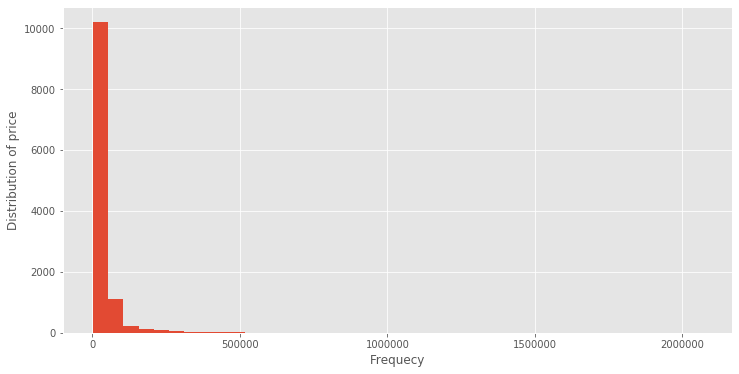

In [74]:
plt.figure(figsize=(12,6))
plt.hist(df.Price,bins= 40)
plt.xlabel('Frequecy')
plt.ylabel('Distribution of price')
plt.show()

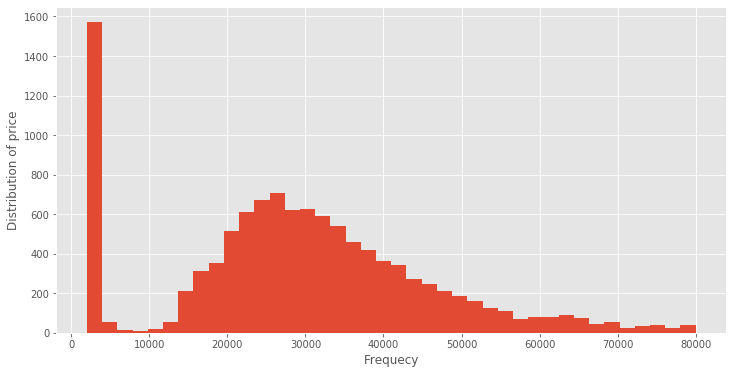

In [73]:
plt.figure(figsize=(12,6))
plt.hist(df.Price[df['Price'] < 80000],bins=40)
plt.xlabel('Frequecy')
plt.ylabel('Distribution of price')
plt.show()